In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy 

In [20]:
df = pd.read_csv('DatosPrueba.csv', delimiter=';')
df = df.drop(columns=['Unnamed: 0.1'], axis=1)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,"45,0",Jeremy,White,M,9443 Cynthia Court Apt. 038,...,"46,2306","-112,1138",1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,"47,034331","-112,561071",0
1,10,2019-01-01 00:06:23,4642894980163,fraud_Rutherford-Mertz,grocery_pos,"24,74",Eddie,Mendez,M,1831 Faith View Suite 653,...,"40,7491","-95,038",7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,"40,275891","-96,011548",0
2,27,2019-01-01 00:21:32,4334230547694630,fraud_Bruen-Yost,misc_pos,"6,85",Scott,Martin,M,7483 Navarro Flats,...,"43,0172","-111,0292",471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,1325377292,"43,753735","-111,454923",0
3,32,2019-01-01 00:22:44,630412733309,fraud_Torphy-Goyette,shopping_pos,"66,21",Heather,Stanton,F,445 Jerry Lights Apt. 081,...,"46,368","-87,9938",1038,Armed forces training and education officer,1964-04-22,20f048d3907dbb9978e23bee7b7578ce,1325377364,"46,412038","-88,516663",0
4,34,2019-01-01 00:23:58,374125201044065,"fraud_Bahringer, Schoen and Corkery",shopping_pos,"9,03",Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,...,"38,9757","-77,0282",601723,"Optician, dispensing",1970-07-20,c733711c521c41c578f4a964d8350df0,1325377438,"38,880898","-76,44111600000002",0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200881 entries, 0 to 200880
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             200881 non-null  int64 
 1   trans_date_trans_time  200881 non-null  object
 2   cc_num                 200881 non-null  int64 
 3   merchant               200881 non-null  object
 4   category               200881 non-null  object
 5   amt                    200881 non-null  object
 6   first                  200881 non-null  object
 7   last                   200881 non-null  object
 8   gender                 200881 non-null  object
 9   street                 200881 non-null  object
 10  city                   200881 non-null  object
 11  state                  200881 non-null  object
 12  zip                    200881 non-null  int64 
 13  lat                    200881 non-null  object
 14  long                   200881 non-null  object
 15  

In [22]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
# Ubah amt menjadi float
df['amt'] = df['amt'].str.replace(',', '.').astype(float)

In [25]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,city_pop,unix_time,is_fraud
count,2.008810e+05,2.008810e+05,200881.000000,200881.000000,2.008810e+05,2.008810e+05,200881.000000
mean,6.486983e+05,4.156141e+17,85.128618,48826.911331,8.920038e+04,1.349255e+09,0.037365
std,3.753200e+05,1.306632e+18,180.409147,26914.330746,3.019086e+05,1.287819e+07,0.189656
min,3.000000e+00,6.041621e+10,1.000000,1257.000000,2.300000e+01,1.325376e+09,0.000000
25%,3.227590e+05,1.800429e+14,9.840000,26237.000000,7.430000e+02,1.338724e+09,0.000000
50%,6.494780e+05,3.521417e+15,48.860000,48174.000000,2.456000e+03,1.349299e+09,0.000000
75%,9.756200e+05,4.642255e+15,86.650000,72042.000000,2.032800e+04,1.359589e+09,0.000000
max,1.296674e+06,4.992346e+18,14467.640000,99783.000000,2.906700e+06,1.371817e+09,1.000000


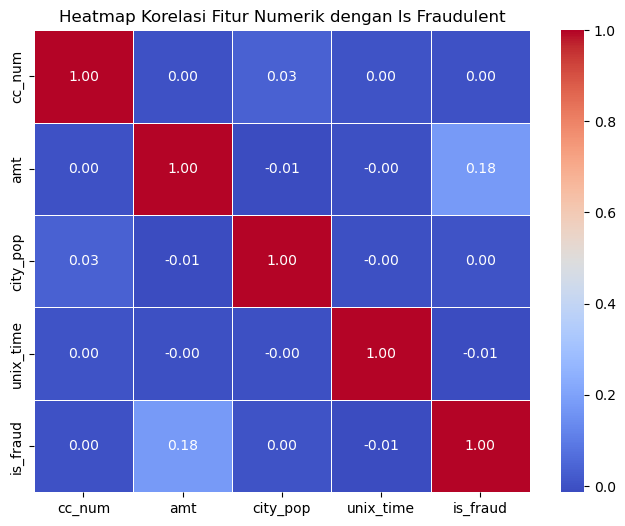

In [27]:

# Pilih kolom numerik + target
num_cols = ['cc_num', 'amt', 'city_pop', 'unix_time']
corr_matrix = df[num_cols + ['is_fraud']].corr(method='kendall')

# Visualisasi semua korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik dengan Is Fraudulent')
plt.show()


In [29]:
from scipy.stats import chi2_contingency

# Fungsi Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

# cat columns merupakan kolom yang bukan anggota num_cols
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Hitung Cramer's V untuk setiap kolom kategorikal terhadap target
cramers_result = {}
for col in cat_cols:
    cramers_result[col] = cramers_v(df[col], df['is_fraud'])

# Ubah jadi DataFrame biar rapi
cramers_df = pd.DataFrame.from_dict(cramers_result, orient='index', columns=['Cramer\'s V']).sort_values(by="Cramer's V", ascending=False)
print(cramers_df)


                       Cramer's V
trans_num                1.000000
trans_date_trans_time    0.998788
merch_long               0.998580
merch_lat                0.997124
street                   0.350966
dob                      0.347899
lat                      0.346786
long                     0.346728
city                     0.318049
job                      0.208270
last                     0.196292
first                    0.181021
merchant                 0.180191
category                 0.173989
state                    0.051480
gender                   0.019010


C:\Users\Dionisius\AppData\Local\Temp\ipykernel_26560\3100984472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')


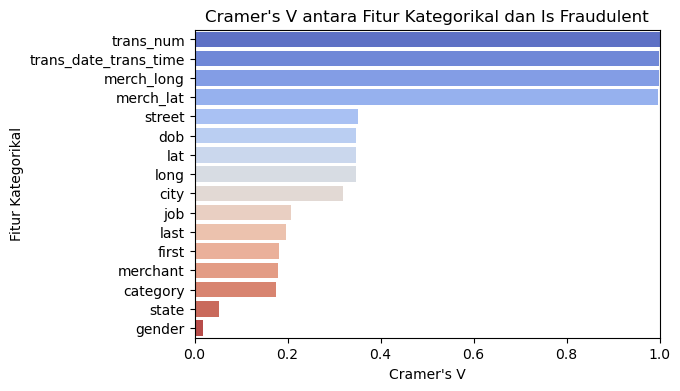

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')
plt.title("Cramer's V antara Fitur Kategorikal dan Is Fraudulent")
plt.xlabel("Cramer's V")
plt.ylabel("Fitur Kategorikal")
plt.xlim(0, 1)
plt.show()


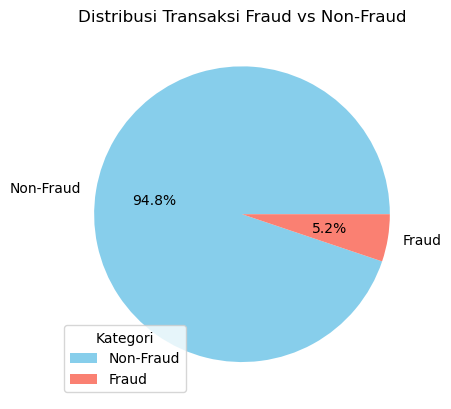

In [12]:
df['Is Fraudulent'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['Non-Fraud', 'Fraud'])
plt.title('Distribusi Transaksi Fraud vs Non-Fraud')
plt.ylabel('')
plt.legend(title='Kategori', labels=['Non-Fraud', 'Fraud'], loc='best')
plt.show()

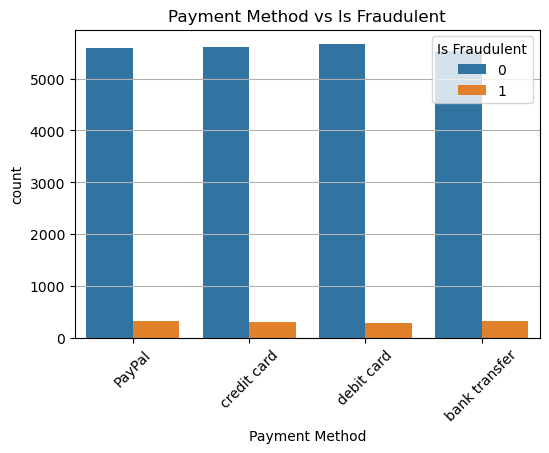

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Payment Method', hue='Is Fraudulent')
plt.title('Payment Method vs Is Fraudulent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

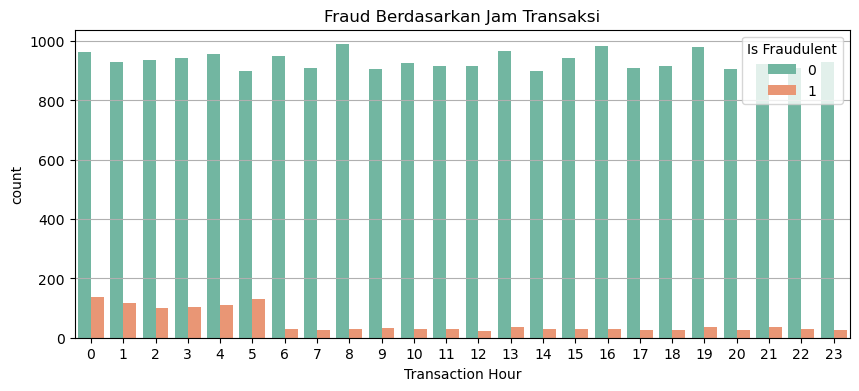

In [14]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Transaction Hour', hue='Is Fraudulent', palette='Set2')
plt.title('Fraud Berdasarkan Jam Transaksi')
plt.grid(axis='y')
plt.show()
